### 목표 
- 선형회귀이론, 선형회귀 모델에 대해 이해 !
- 호주 멜버른 집가격 데이터 셋을 활용
    - 호주 주택 시장의 동향 및 가격 분석, 여러 특성들간의 관계성

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [204]:
house_data = pd.read_csv("./data/melb_data.csv")
house_data
# 호주 멜버른 지역의 집에 대한 데이터셋

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


| 컬럼명          | 설명                                                              |
|-----------------|-----------------------------------------------------------------|
| **Suburb**      | 주택이 위치한 교외 지역의 이름                                         |
| **Address**     | 주택의 주소                                                        |
| **Rooms**       | 주택의 방 개수                                                     |
| **Type**        | 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)                             |
| **Price**       | 주택 가격                                                         |
| **Method**      | 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개) |
| **SellerG**     | 판매 대행 부동산 중개인의 이름                                         |
| **Date**        | 판매 날짜                                                         |
| **Distance**    | 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)                 |
| **Postcode**    | 우편번호                                                          |
| **Bedroom2**    | 주택의 침실 개수 (2개의 침실을 갖춘 주택)                               |
| **Bathroom**    | 주택의 욕실 개수                                                    |
| **Car**         | 주차 가능한 자동차 수                                                |
| **Landsize**    | 대지 면적 (평방 미터 단위)                                            |
| **BuildingArea**| 건축 면적 (평방 미터 단위)                                            |
| **YearBuilt**   | 주택이 건축된 연도                                                   |
| **CouncilArea** | 관할 구역                                                         |
| **Lattitude**   | 주택의 위도                                                        |
| **Longtitude**  | 주택의 경도                                                        |
| **Regionname**  | 지역 이름                                                         |
| **Propertycount**| 지역 내의 부동산 개수                                              |

In [205]:
house_data.info()
# 정답 컬럼 : Price -> 집 가격에 어떠한 특성들이 영향을 주는지에 대해서 인사이트 도출!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### 전처리 & EDA
- 전처리
    1. 결측치 대체, 제거
    2. 이상치 대체, 제거
    3. 변수 처리 -> 특성 공학(Feature Engeeniring), 정규화, 인코딩 등
    4. 데이터 분리
---
- EDA (탐색적 데이터 분석)
    - 특성들끼리의 관계는 어떠한지?
    - 정답 데이터와 문제 데이터간의 관계는 어떠한지?
    - 특정 문제 데이터가 정답데이터에 영향을 주는지?

In [206]:
# 결측치가 있는 특성 확인
house_data.isnull().sum().sort_values()[::-1]


BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

#### EDA 탐색적 데이터 분석
- 시각화

In [207]:
house_data.describe().T
# 기술통계량 확인(요약된 정보로 확인!)

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [208]:
house_data['Rooms'].value_counts()

Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: count, dtype: int64

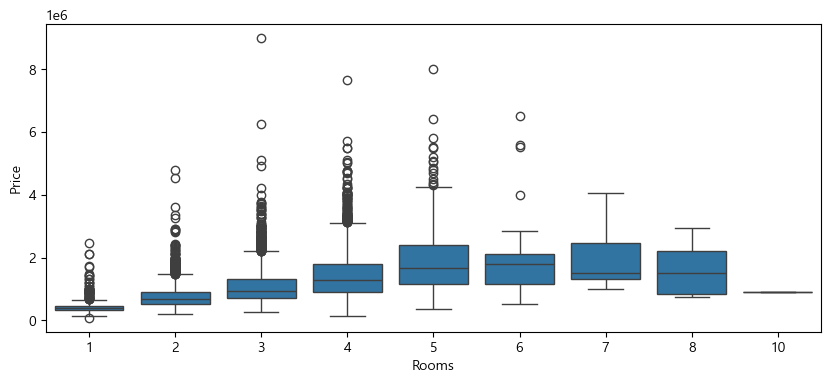

In [209]:
# 이상치에 대한 시각화
plt.figure(figsize = (10,4))
sns.boxplot(
    data = house_data,
    x = "Rooms",
    y = "Price"
)
plt.show()

# Rooms 가 1~6까지 증가함에 따라 집값의 중앙값이 상승하는 경향

In [210]:
# 방이 3개일 때 이상치 확인
# IQR 기법

house_data_rooms = house_data[house_data["Rooms"] == 3]

Q1 = house_data_rooms["Price"].quantile(0.25) # 1사분위수(25%) 반환!
Q3 = house_data_rooms["Price"].quantile(0.75)

IQR = Q3 - Q1 #Interquartile Range

over = Q3 + (IQR * 1.5) # 상한선 구하기
under = Q1 - (IQR * 1.5) # 하한선 구하기

house_data_rooms[(house_data_rooms["Price"] >= over) | (house_data_rooms["Price"] <= under)]
# 이상치를 확정짓는 건 분석가의 몫

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,...,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,3206.0,...,2.0,1.0,177.0,181.0,1880.0,Port Phillip,-37.84150,144.95850,Southern Metropolitan,3280.0
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,...,2.0,1.0,228.0,NaN,NaN,Port Phillip,-37.84450,144.95010,Southern Metropolitan,3280.0
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,...,2.0,0.0,147.0,146.0,1890.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0
112,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,26/07/2016,3.3,3206.0,...,2.0,2.0,325.0,NaN,NaN,Port Phillip,-37.84130,144.95000,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,Albert Park,59 Barrett St,3,h,2340000.0,S,Greg,26/08/2017,3.0,3206.0,...,2.0,1.0,162.0,135.0,1880.0,NaN,-37.84398,144.95044,Southern Metropolitan,3280.0
13337,Albert Park,6 Pickles St,3,h,2225000.0,S,Greg,26/08/2017,3.0,3206.0,...,1.0,1.0,241.0,NaN,NaN,NaN,-37.84479,144.94429,Southern Metropolitan,3280.0
13344,Ashburton,59 Winton Rd,3,h,2550000.0,S,Marshall,26/08/2017,10.2,3147.0,...,2.0,3.0,1170.0,202.0,1950.0,NaN,-37.87253,145.07050,Southern Metropolitan,3052.0
13377,Brunswick West,16 Temple St,3,h,2350000.0,VB,Collins,26/08/2017,5.2,3055.0,...,2.0,2.0,445.0,160.0,1925.0,NaN,-37.76645,144.94133,Northern Metropolitan,7082.0


In [211]:
# Type 살펴보기
house_data["Type"].describe()
house_data["Type"].unique()
# h : 독립된 단독 주택
# u : 하나의 건물 내에 개별 주거 공간
# t : 타운하우스

array(['h', 'u', 't'], dtype=object)

<Axes: xlabel='Type'>

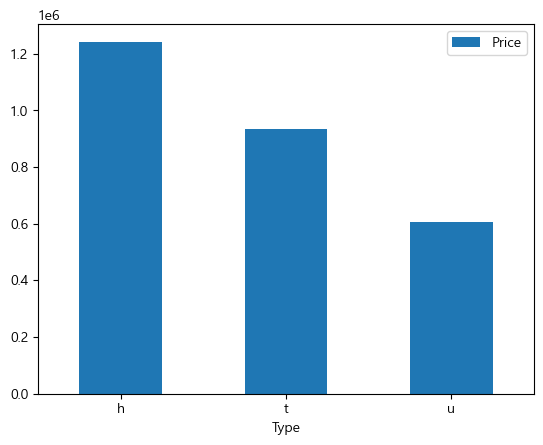

In [212]:
#Type별로 주택 평균  가겨 확인
house_data[["Type", "Price"]].groupby("Type").mean().plot(kind="bar", rot = 0)

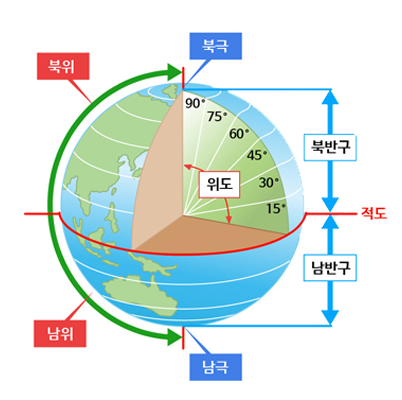

In [213]:
# 한글설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False # - 기호 표시

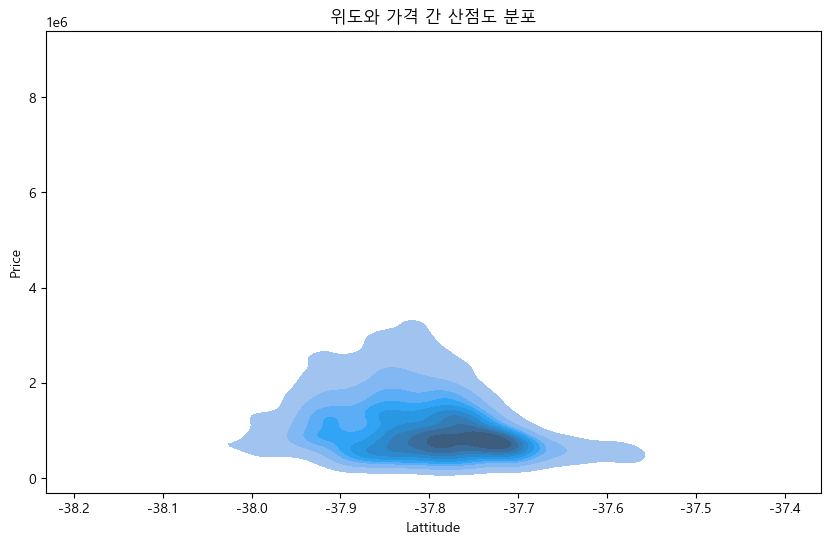

In [214]:
# 위도와 가격 간의 관계

plt.figure(figsize = (10,6))
sns.kdeplot( # 산점도를 부드러운 곡선형태로 시각화 하는 도구
    data = house_data,
    x = "Lattitude",
    y = "Price",
    fill = True # 차트의 밀도가 높은 부분을 색으로 채우겠다!
)
plt.title("위도와 가격 간 산점도 분포")
plt.show()
# 주로 위도 -37.8 ~ -37.7도 사이에 데이터가 집중 되어있음 -> 0~2(200만달러, 27억원)
# 37.8도 근처 일부 집값이 더 높아질 가능성이 존재함을 관측

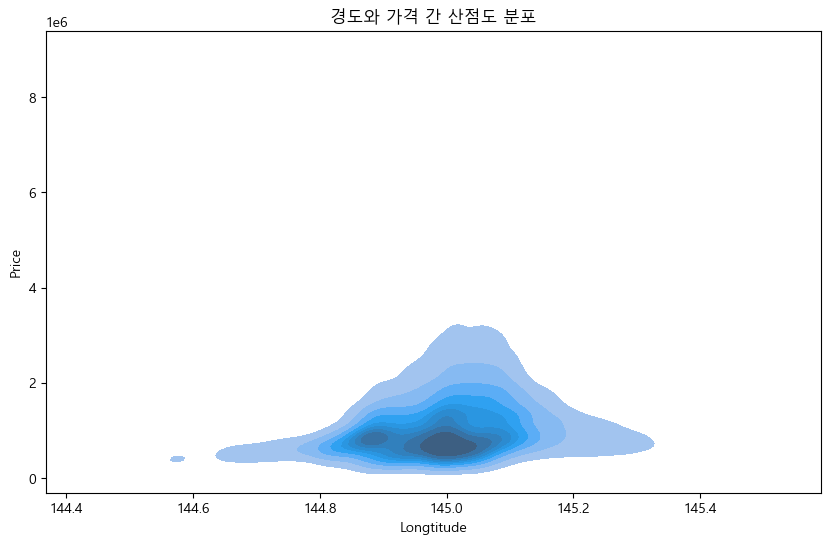

In [215]:
# 경도와 가격 간의 관계

plt.figure(figsize = (10,6))
sns.kdeplot( # 산점도를 부드러운 곡선형태로 시각화 하는 도구
    data = house_data,
    x = "Longtitude", # 경도
    y = "Price",
    fill = True # 차트의 밀도가 높은 부분을 색으로 채우겠다!
)
plt.title("경도와 가격 간 산점도 분포")
plt.show()
# 경도 144.9 ~ 145.2 사이에 많은 집이 위치하고 있음을 확인, 대부분의 집은 Price 0~2 사이에 있음
# 경도 144.8 이하 (서쪽), 경도 145.2 이상(동쪽)의 경우 집 데이터 밀집이 중심으로부터 낮음, 가격도 낮은 경향을 보임

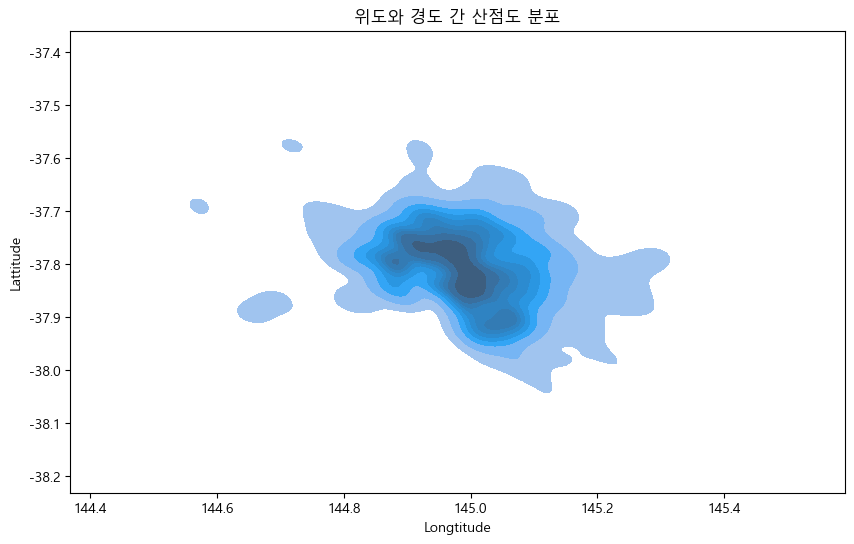

In [216]:
# 위도랑 경도를 기준으로 그려보자!
plt.figure(figsize = (10,6))
sns.kdeplot( # 산점도를 부드러운 곡선형태로 시각화 하는 도구
    data = house_data,
    x = "Longtitude", # 경도
    y = "Lattitude", # 위도
    fill = True # 차트의 밀도가 높은 부분을 색으로 채우겠다!
)
plt.title("위도와 경도 간 산점도 분포")
plt.show()

In [217]:
# 어떤 위치에 주택들이 모여있는지 확인
# CountcilArea(관할구역) 값 확인
house_data["CouncilArea"].unique() # 호주 멜버린 지역의 관할구역 확인

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [218]:
len(house_data["CouncilArea"].unique())

34

<Axes: xlabel='CouncilArea', ylabel='count'>

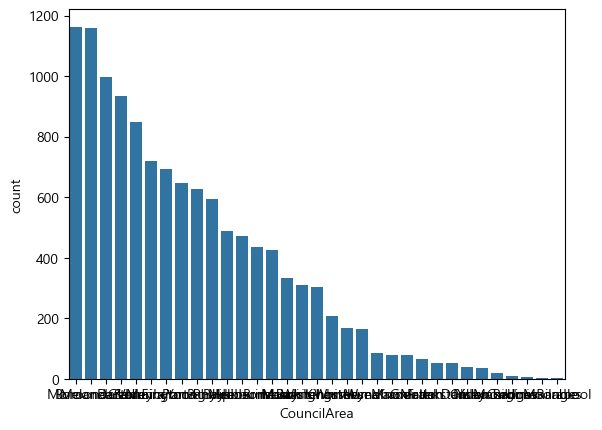

In [219]:
# 관할구역별로 주택의 수 분포 확인
sns.countplot(
    house_data,
    x = "CouncilArea",
    order = house_data["CouncilArea"].value_counts().index
)

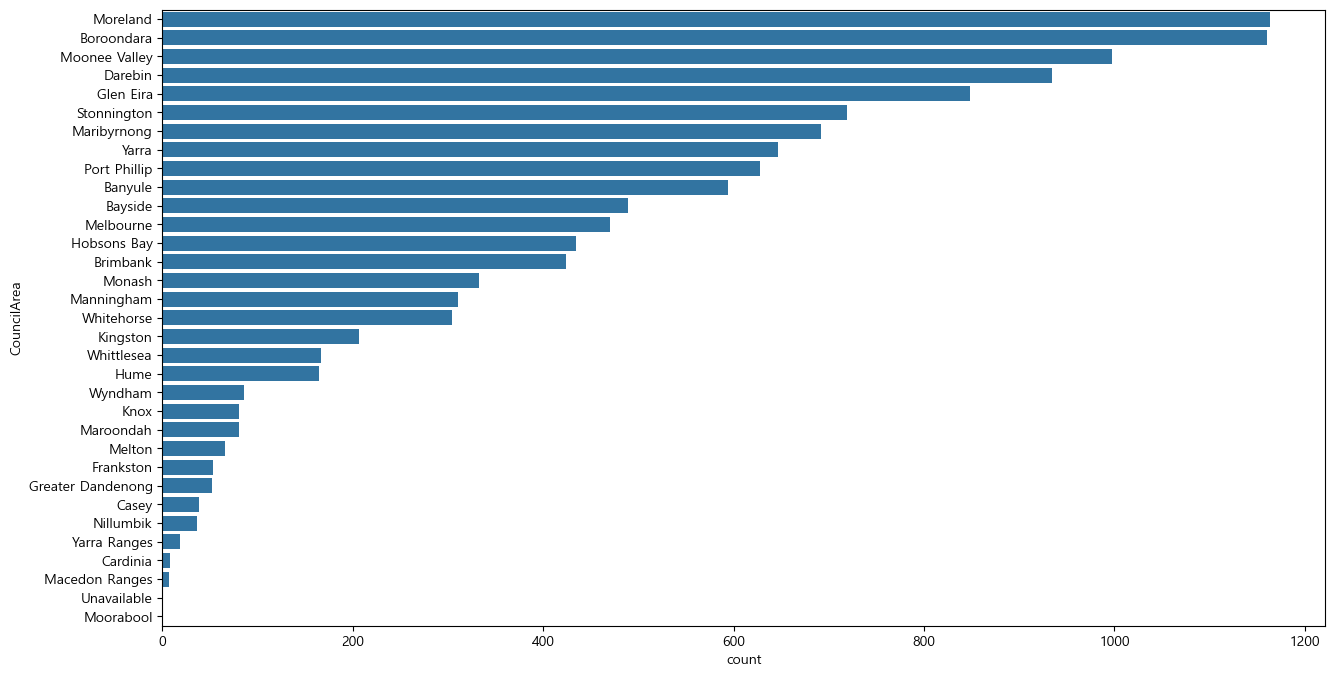

In [220]:
# 관할구역별로 주택의 수 분포 확인
plt.figure(figsize = (15,8))
sns.countplot(
    house_data,
    y = "CouncilArea", # x(수직막대), y(수평 막대)로 설정
    order = house_data["CouncilArea"].value_counts().index # 정렬 기준
)
plt.show()
# Moreland, Boroondara의ㅏ 관할 구역이 빈도가 높음을 관측

In [221]:
house_data["CouncilArea"].isnull().sum()

1369

In [222]:
# 결측치 대체
# 단순하게 채워보고자 하느ㅏㄴ 경우 -> 수치형은 평균이나 중앙값, 범주형은 최빈값
house_data["CouncilArea"].fillna("Moreland")

# 결측치를 채울 때 단순 기술통계량으로 채워볼 수는 있음
# 허나, 연관성이 있는 데이터로 채워주는 겨웅 모델의 성능을 높일 수 있음

0           Yarra
1           Yarra
2           Yarra
3           Yarra
4           Yarra
           ...   
13575    Moreland
13576    Moreland
13577    Moreland
13578    Moreland
13579    Moreland
Name: CouncilArea, Length: 13580, dtype: object

In [223]:
pd.set_option("display.max_rows", None) # 전체 행 출력으로 변경

In [224]:
# 관할구역과 가장 연관이 높을 법한 컬럼(Subrub, 주택이 위치한 교외지역) 활용
house_data.pivot_table(
    values = "Rooms",
    index = ["Suburb", "CouncilArea"],
    aggfunc = "count"
)

Rooms
Suburb             CouncilArea             
Abbotsford         Yarra                 55
Aberfeldie         Moonee Valley         40
Airport West       Moonee Valley         61
Albanvale          Brimbank               4
Albert Park        Port Phillip          64
Albion             Brimbank              38
Alphington         Darebin               25
                   Yarra                  7
Altona             Hobsons Bay           69
Altona Meadows     Hobsons Bay            4
Altona North       Hobsons Bay           49
Ardeer             Brimbank               2
Armadale           Stonnington           86
Ascot Vale         Moonee Valley        125
Ashburton          Boroondara            53
Ashwood            Monash                45
Aspendale          Kingston               4
Aspendale Gardens  Kingston               2
Avondale Heights   Moonee Valley         73
Bacchus Marsh      Moorabool              1
Balaclava          Port Phillip          25
Balwyn             Boroondara           101
Balwyn North       Boroondara           151
Bayswater          Knox                  12
Bayswater North    Maroondah              5
Beaconsfield       Cardinia               2
Beaconsfield Upper Cardinia               1
Beaumaris          Bayside               11
Bellfield          Banyule               15
Bentleigh          Glen Eira            131
Bentleigh East     Glen Eira            234
Berwick            Casey                 11
Black Rock         Bayside                8
Blackburn          Whitehorse            13
Blackburn North    Whitehorse             7
Blackburn South    Whitehorse             8
Bonbeach           Kingston               1
Boronia            Knox                  12
Box Hill           Whitehorse            54
Braybrook          Maribyrnong           44
Briar Hill         Banyule                5
Brighton           Bayside              176
Brighton East      Bayside              124
                   Glen Eira              4
Broadmeadows       Hume                  17
Brookfield         Melton                 1
Brooklyn           Brimbank               1
                   Hobsons Bay            7
Brunswick          Moreland             208
Brunswick East     Moreland              80
Brunswick West     Moreland             102
Bulleen            Manningham            65
Bullengarook       Macedon Ranges         1
Bundoora           Banyule               13
                   Darebin                2
                   Whittlesea            10
Burnley            Yarra                  7
Burnside Heights   Melton                 2
Burwood            Monash                14
                   Whitehorse            61
Burwood East       Whitehorse            12
Cairnlea           Brimbank               7
Camberwell         Boroondara           124
Campbellfield      Hume                   3
Canterbury         Boroondara            51
Carlton            Melbourne             48
Carlton North      Yarra                 44
Carnegie           Glen Eira            138
Caroline Springs   Melton                 9
Carrum             Kingston               9
Carrum Downs       Frankston              7
Caulfield          Glen Eira             12
Caulfield East     Glen Eira              8
Caulfield North    Glen Eira             35
Caulfield South    Glen Eira             45
Chadstone          Monash                34
Chelsea            Kingston               4
Chelsea Heights    Kingston               2
Cheltenham         Bayside                4
                   Kingston              26
Chirnside Park     Yarra Ranges           2
Clarinda           Kingston               2
Clayton            Monash                11
Clayton South      Kingston               3
Clifton Hill       Yarra                 52
Coburg             Moreland             176
Coburg North       Darebin                1
                   Moreland              53
Collingwood        Yarra                 62
Coolaroo           Hume           

In [225]:
# 최빈값으로 구성된 테이블 생성
mode_data = house_data.groupby("Suburb")["CouncilArea"].agg(pd.Series.mode)
mode_data

Suburb
Abbotsford                        Yarra
Aberfeldie                Moonee Valley
Airport West              Moonee Valley
Albanvale                      Brimbank
Albert Park                Port Phillip
Albion                         Brimbank
Alphington                      Darebin
Altona                      Hobsons Bay
Altona Meadows              Hobsons Bay
Altona North                Hobsons Bay
Ardeer                         Brimbank
Armadale                    Stonnington
Ascot Vale                Moonee Valley
Ashburton                    Boroondara
Ashwood                          Monash
Aspendale                      Kingston
Aspendale Gardens              Kingston
Attwood                              []
Avondale Heights          Moonee Valley
Bacchus Marsh                 Moorabool
Balaclava                  Port Phillip
Balwyn                       Boroondara
Balwyn North                 Boroondara
Bayswater                          Knox
Bayswater North               Mar

In [226]:
# 결측치 채우는 함수 정의 -> CouncilArea를 확인해서 값이 있으면 그대로 반환, 결측치인 경우 Suburb에 매칭 된 데이터
def fill_council(row) : 
    if pd.isnull(row["CouncilArea"]) : # 결측치인 경우 True
        return mode_data[row["Suburb"]] # Suburb에 매칭 된 데이터 반환
    else : 
        return row["CouncilArea"] # 그대로 반환

In [227]:
pd.isnull(house_data.iloc[10000]["CouncilArea"])

False

In [228]:
# 결측치 채우기!
house_data["CouncilArea"] = house_data.apply(fill_council, axis = 1)

In [229]:
house_data["CouncilArea"].isnull().sum() # 결측치 여부 확인!

0

In [230]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [231]:
# 상관계수 확인! -> BuildingArea, YearBuilt, Car와 연관성이 높을법한 컬럼을 확인해보자...!
house_corr = house_data.corr(numeric_only = True)

In [232]:
house_data.isnull().sum() # 결측치 조회

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [233]:
# Price와 연관도가 높은지 확인
house_corr["Price"].abs().sort_values()[::-1]
# BuildingArea은 약 0.09정도로 거의 관계가 없음으로 관측됨
# YearBuilt는 약 0.32정도로 관계성을 가지면서 영향을 줌, 그런데 결측치가 많음
# 문제데이터로 적함하지 않다고 판단될 경우 특성 선택을 통해 제외

# Car는 약 0.23정도로 어느 정도 관계가 있음, 결측치도 몇 개 없음
# 결측치가 몇 개 안되서 채우더라도 Price예측에 크게 영향을 주지 않을 것으로 판단..!

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

In [234]:
house_corr["Car"].abs().sort_values()[::-1]
# Car와 가장 연관이 높을 컬럼 선정 -> Rooms, Bedroom2

Car              1.000000
Rooms            0.408483
Bedroom2         0.405325
Bathroom         0.322246
Distance         0.262994
Price            0.238979
YearBuilt        0.104515
BuildingArea     0.096101
Longtitude       0.063395
Postcode         0.050289
Landsize         0.026770
Propertycount    0.024295
Lattitude        0.001963
Name: Car, dtype: float64

In [235]:
# 피벗테이블 만들기
car_pivot = house_data.pivot_table(
    values = "Car",
    index = ["Rooms", "Bedroom2"],
    aggfunc = "mean"
)

In [236]:
# 다중 인덱싱 : 두 개 이상의 인덱스가 있을 때 값을 지정
car_pivot.loc[(1,1.0), "Car"].round() 

1.0

In [237]:
# 다중 인덱싱 재료 만들어보기
temp_data = house_data.iloc[30]
temp_data["Rooms"], temp_data["Bedroom2"]

(4, 4.0)

In [238]:
# Car 결측치를 처리하는 함수 정의
def fill_car(row) : 
    # 만약에 Car 값이 비어있다면, 피벗테이블의 데이터로 채우기
    if pd.isnull(row["Car"]) :
        return car_pivot.loc[(row["Rooms"],row["Bedroom2"]), "Car"].round() 
        
    # 그렇지 않다면 ( Car 값이 비어있지 않다면) 원래 값을 그대로 사용
    else : 
        return row["Car"]

In [239]:
pd.isna(house_data.iloc[12320]["Car"])

True

In [240]:
house_data["Car"] = house_data.apply(fill_car, axis = 1).astype("int64")

In [241]:
house_data["Car"].isnull().sum()

0

In [242]:
house_data["Car"][12489]

2

#### 모델링
- 선형 회귀

In [243]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  int64  
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [244]:
house_corr["Price"].abs().sort_values()[::-1]

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

In [245]:
# 학습에 사용할 입력 특성 선택
feature_names = ["Rooms", "Bedroom2", "Bathroom","Car", "Lattitude", "Longtitude", "Distance","Type", "CouncilArea"]

##### 학습을 위한 데이터 분리
- X(문제), y(정답) -> 문제 데이터는 항상 2차원이어야 함!
- 훈련용, 평가용 데이터 분리

In [246]:
# 전체 행 보기 초기화|
pd.reset_option("display.max_rows") 
# 출력되는데도 자원이 소모됨 -> 버벅거리거나 커널이 끊기는 경우가 발생
# 필요시에만 활성화 시키는 걸 권장

In [247]:
# 문제, 정답 분리!
X = house_data[feature_names]
y = house_data["Price"]

In [248]:
X.shape, y.shape

((13580, 9), (13580,))

In [249]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        13580 non-null  int64  
 1   Bedroom2     13580 non-null  float64
 2   Bathroom     13580 non-null  float64
 3   Car          13580 non-null  int64  
 4   Lattitude    13580 non-null  float64
 5   Longtitude   13580 non-null  float64
 6   Distance     13580 non-null  float64
 7   Type         13580 non-null  object 
 8   CouncilArea  13580 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 955.0+ KB


### 인코딩
- sklearn에서 제공되는 모델들은 입력값(문제데이터)을 2차원, 숫자형으로만 받게끔 설계되어있음!
> 라벨 인코딩, 원핫 인코딩, 빈도 인코딩, 임베딩...

- 인코딩(Encodding) : 범주형 -> 숫자형
- 바이닝(Bining) : 숫자형 -> 범주형
- 디코딩(Decoding) : 숫자형 -> 문자형
- 라벨 인코딩(Label Encding) -> 값의 높낮이가 유의미할 때 활용!
> - a -> 1, b -> 2, c -< 3...
> - 특정값을 지목해서 바꿈

- 원핫 인코딩(One-hot Encdong) -> 값의 높낮이가 유의미하지 않을 때 활용!
> - a -> 1 0 0, b -> 0 1 0, c -> 0 0 1...
> - 차원을 고유값만큼 확장시킨 후, 해당되는 값만 1로 나머지는 0으로 표현

In [250]:
# TypeError : unhashable type : 'numpy.ndarray' -> CouncilArea 컬럼 내에 array 형태 데이터가 있어서 적용이 안 됨!
X["CouncilArea"] =  X["CouncilArea"].astype("str")

In [251]:
temp = X[X["CouncilArea"] == "[]"]
temp.index

Index([12251, 12438, 12865, 13245, 13264, 13381, 13494], dtype='int64')

In [252]:
X.drop(temp.index, inplace = True) # [] 형태로 표현되어 있는 CouncilArea의 인덱스를 활용해서 데이터를 제거
y.drop(temp.index, inplace = True)

In [254]:
# 원핫 인코딩이 적절하다고 판단됨!
X_one_hot = pd.get_dummies(X, dtype = "int64")

In [258]:
X_one_hot.shape, y.shape

((13573, 43), (13573,))

In [259]:
X_one_hot.head()

,Rooms,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,1,-37.7996,144.9984,2.5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,0,-37.8079,144.9934,2.5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.0,2.0,0,-37.8093,144.9944,2.5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3.0,2.0,1,-37.7969,144.9969,2.5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,3.0,1.0,2,-37.8072,144.9941,2.5,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [260]:
X_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13573 entries, 0 to 13579
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rooms                          13573 non-null  int64  
 1   Bedroom2                       13573 non-null  float64
 2   Bathroom                       13573 non-null  float64
 3   Car                            13573 non-null  int64  
 4   Lattitude                      13573 non-null  float64
 5   Longtitude                     13573 non-null  float64
 6   Distance                       13573 non-null  float64
 7   Type_h                         13573 non-null  int64  
 8   Type_t                         13573 non-null  int64  
 9   Type_u                         13573 non-null  int64  
 10  CouncilArea_Banyule            13573 non-null  int64  
 11  CouncilArea_Bayside            13573 non-null  int64  
 12  CouncilArea_Boroondara         13573 non-null  int6

In [261]:
# 훈련용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split # 훈련용, 평가용 데이터 분리 도구

(9501, 43) (4072, 43) (9501,) (4072,)


,Rooms,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
7910,3,3.0,1.0,1,-37.7073,144.9355,13.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7635,2,2.0,1.0,0,-37.7622,144.9406,5.9,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7988,2,2.0,1.0,2,-37.7369,145.0371,9.4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7701,5,5.0,3.0,2,-37.7915,144.9737,3.2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8107,3,3.0,1.0,2,-37.7616,144.9284,6.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
# 모델 도구 불러오기
from sklearn.linear_model import LinearRegression # 선형 회귀 모델

In [263]:
# 모델 생성(초기화)
house_model_linear = LinearRegression()

In [264]:
# 모델 학습
house_model_linear.fit(X_train, y_train)

LinearRegression()

In [266]:
# 모델 평가
house_model_linear.score(X_test, y_test)
# 일반적인 경험에 의하면 0.7 이상 되면 진짜 잘나오는 거임...!

0.5975812070083791

#### 성능 평가 지표
- 분류와 회귀의 평가지표는 다름!
- 회귀 평가 지표
> - MAE(Mean Absolute Error, 평균 절대 오차) : 오차에 절대값을 취하여 평균내는 도구(함수)
> - MSE(Mean Squared Error, 평균 제곱 오차) : 오차에 제곱을 취하여 평균내는 도구(함수)
> - RMSE(Root MSE, 평균 제곱근 오차) : 오차에 제곱을 취하여 평균 낸 이후, 제곱근을 씌워서 반환하는 도구(함수)
> - R2 Squared(r2 score) : 데이터의 변동성(분산, 퍼짐 정도)을 모델이 얼마나 이해하고 있는지(잘 설명하고 있는지)를 백분율로 나타내는 도구(함수)
>    - 0 ~ 1, 1에 가까울수록 모델이 데이터의 변동성을 잘 이해했다! 

In [267]:
X_train.shape

(9501, 43)

In [269]:
# 가중치(w), 절편(b) 확인 
# y = w1x1 + w2x2 +...w43x43+ b
print(f"가중치 : {house_model_linear.coef_}") # coefficient
print(f"절편 : {house_model_linear.intercept_}")

가중치 : [ 1.57987000e+05  2.55839013e+04  1.78204080e+05  4.10691281e+04
 -1.84773972e+06 -1.77812142e+05 -3.67422721e+04  2.92648835e+05
 -5.17004739e+04 -2.40948362e+05 -6.82663617e+03  3.73874082e+05
  4.48757866e+05 -3.77197763e+05  1.08032434e+04 -2.03987214e+05
 -1.50177456e+04 -1.24571047e+05 -4.57341457e+03 -2.67202533e+05
 -2.38044146e+05 -9.12532328e+04 -1.47465389e+05 -1.12570610e+05
  1.02780745e+06  1.14229740e+05 -3.00233049e+05  1.08563779e+05
 -2.94520190e+04 -1.37976839e+05 -2.95935632e+04 -4.91780630e+04
  1.16415322e-09 -1.32436828e+05  1.07202418e+04  1.36821307e+05
  2.74619163e+05  0.00000000e+00  1.42634717e+05 -9.09426200e+03
 -7.15238647e+05  2.98982756e+04  3.13183137e+05]
절편 : -43673673.70165981


In [279]:
# 가중치와 컬럼명을 매핑
feature_names = X_train.columns
coefficients = house_model_linear.coef_

for feature, coef in zip(feature_names, coefficients) :
    print(f"{feature} : {coef:.2f}")
# 양의 가중치 : 해당 특성이 증가할 때 Price도 증가함을 의미
# 예를 들면 Rooms의 w = 157,987 -> 방의 개수가 하나 늘어날 때마다 약 157,987 달러가 증가할 것이라는 것을 의미
    
# 음의 가중치 : 해당 특성이 증가할 때 Price은 감소함을 의미
# 예를 들면 Lattitude의 w = 1,847,739 -> 위도가 증가할수록 약 180만 달러가 감소할 것이라는 것을 의미


Rooms : 157987.00
Bedroom2 : 25583.90
Bathroom : 178204.08
Car : 41069.13
Lattitude : -1847739.72
Longtitude : -177812.14
Distance : -36742.27
Type_h : 292648.84
Type_t : -51700.47
Type_u : -240948.36
CouncilArea_Banyule : -6826.64
CouncilArea_Bayside : 373874.08
CouncilArea_Boroondara : 448757.87
CouncilArea_Brimbank : -377197.76
CouncilArea_Cardinia : 10803.24
CouncilArea_Casey : -203987.21
CouncilArea_Darebin : -15017.75
CouncilArea_Frankston : -124571.05
CouncilArea_Glen Eira : -4573.41
CouncilArea_Greater Dandenong : -267202.53
CouncilArea_Hobsons Bay : -238044.15
CouncilArea_Hume : -91253.23
CouncilArea_Kingston : -147465.39
CouncilArea_Knox : -112570.61
CouncilArea_Macedon Ranges : 1027807.45
CouncilArea_Manningham : 114229.74
CouncilArea_Maribyrnong : -300233.05
CouncilArea_Maroondah : 108563.78
CouncilArea_Melbourne : -29452.02
CouncilArea_Melton : -137976.84
CouncilArea_Monash : -29593.56
CouncilArea_Moonee Valley : -49178.06
CouncilArea_Moorabool : 0.00
CouncilArea_Moreland 

In [280]:
# 평가지표 활용
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [284]:
y_pred = house_model_linear.predict(X_test) # 예측
print(f"MSE : {mean_squared_error(y_test, y_pred)}") # MSE
print(f"RMSE : {mean_squared_error(y_test, y_pred)**0.5}") # RMSE
print(f"MAE : {mean_absolute_error(y_test, y_pred)}") # MAE
print(f"r2 : {r2_score(y_test, y_pred)}") # r2

MSE : 171705795518.80862
RMSE : 414373.98026276776
MAE : 262562.41221784556
r2 : 0.5975812070083791


- 추가적인 분석으로는 다항회귀, 스케일링을 통해서 성능을 끌어올려서 분석의 신빙성을 높일 수 있음...!